In [1]:
import os
import google.generativeai as genai
from PIL import Image
from langchain_core.tools import tool
from dotenv import load_dotenv

# .env 파일에서 API 키를 불러옵니다.
# (Jupyter Notebook과 같은 경로에 .env 파일을 만들고 GOOGLE_API_KEY="여러분의API키" 형식으로 저장해주세요)
load_dotenv()
genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))

print("환경 설정이 완료되었습니다.")

c:\Users\user\anaconda3\envs\moit_agent_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


환경 설정이 완료되었습니다.


In [2]:
# --- 셀 2: '사진 분석 전문가' 도구 정의 (수정본 Ver 2.1) ---

@tool
def analyze_photo_tool(image_paths: list[str]) -> str:
    """
    사용자의 사진(이미지 파일 경로 리스트)을 입력받아,
    그 사람의 성향, 분위기, 잠재적 관심사에 대한 텍스트 분석 결과를 반환합니다.
    """
    # (★수정된 핵심 부분★) - 함수 안에서 라이브러리를 직접 import하여 오류를 방지합니다.
    from PIL import Image

    try:
        print(f"--- 📸 '사진 분석 전문가'가 작업을 시작합니다. (이미지 {len(image_paths)}개) ---")

        # (이하 내용은 이전과 동일합니다)
        model = genai.GenerativeModel('gemini-2.5-flash')

        photo_analysis_prompt_text = """
        당신은 사람들의 일상 사진을 보고, 그 사람의 잠재적인 관심사와 성향을 추측하는 심리 분석가입니다.

        [분석할 사진]
        - 아래 제공된 사진들

        [지시사항]
        1. 주어진 사진들 속 인물, 사물, 배경, 분위기를 종합적으로 분석하세요.
        2. 사진 분석 결과를 바탕으로, 이 사람의 성향과 잠재적인 관심사를 3~4개의 핵심 키워드와 함께 설명해주세요.
        3. 최종 결과는 다른 AI가 이해하기 쉽도록 간결한 분석 보고서 형식으로 작성해주세요.
        """

        image_parts = []
        for path in image_paths:
            img = Image.open(path)
            image_parts.append(img)

        response = model.generate_content([photo_analysis_prompt_text] + image_parts)

        print("--- ✅ 사진 분석이 성공적으로 완료되었습니다. ---")
        return response.text

    except FileNotFoundError as e:
        return f"오류: 이미지 파일을 찾을 수 없습니다. 경로를 확인해주세요. ({e})"
    except Exception as e:
        return f"오류: 사진 분석 중 문제가 발생했습니다: {e}"

In [3]:
# --- 셀 3: 전문가(도구) 단독 테스트 ---

# (중요!) 분석하고 싶은 실제 이미지 파일 경로를 여기에 입력해주세요.
# 윈도우 사용자라면, 경로 구분자를 '/' 또는 '\\'로 사용해주세요.
# 예: "C:/Users/user/Pictures/photo.jpg"
test_image_paths = [
    r"C:/Users/user/Documents/카카오톡 받은 파일/KakaoTalk_20251014_135916907_02.png",
    r"C:/Users/user/Documents/카카오톡 받은 파일/KakaoTalk_20251014_135916907.png",
]

# 전문가(도구)를 직접 호출하여 결과를 확인합니다.
if not test_image_paths:
    print("분석할 이미지가 없습니다. 'test_image_paths' 리스트에 이미지 파일 경로를 추가해주세요.")
else:
    analysis_result = analyze_photo_tool.invoke({"image_paths": test_image_paths})

    print("\n--- 최종 분석 결과 ---")
    print(analysis_result)

--- 📸 '사진 분석 전문가'가 작업을 시작합니다. (이미지 2개) ---
--- ✅ 사진 분석이 성공적으로 완료되었습니다. ---

--- 최종 분석 결과 ---
## 심리 분석 보고서

**[분석 대상 사진]**
1.  실내 헬스장 전경 (다수의 운동 기구, 한 명의 인물)
2.  야외 풋살장 또는 축구장 (여러 명의 인물, 경기 중)

**[종합 분석]**

제공된 두 장의 사진은 모두 활발한 신체 활동과 관련된 환경을 보여줍니다. 첫 번째 사진은 잘 정돈된 현대적인 헬스장 내부로, 개인적인 근력 강화나 체력 단련에 집중하는 모습을 연상시킵니다. 이는 꾸준한 자기 관리와 목표 지향적인 성향을 암시합니다. 두 번째 사진은 여러 사람이 함께 풋살 경기를 즐기는 야외 스포츠 활동으로, 팀워크, 경쟁, 그리고 동료들과의 즐거운 교류를 중시하는 면모를 드러냅니다.

종합적으로 볼 때, 사진 속 인물은 개인적인 건강과 체력 증진에 대한 높은 관심뿐만 아니라, 스포츠를 통한 사회적 교류와 활동적인 생활 방식을 선호하는 경향이 뚜렷합니다. 이는 건강한 육체 활동을 통해 삶의 활력을 얻고, 동시에 사람들과 어울리는 것을 즐기는 긍정적인 성향을 시사합니다.

**[성향 및 잠재적 관심사]**

*   **성향:** 활동적, 자기 관리적, 사교적, 목표 지향적, 경쟁을 즐김
*   **잠재적 관심사:** 건강과 웰빙, 스포츠 및 레저 활동, 팀워크, 신체 능력 향상

**[핵심 키워드]**

1.  **활동적인 라이프스타일**
2.  **자기 관리 및 건강 지향**
3.  **사회적 교류 (스포츠를 통한)**
4.  **경쟁과 성취 추구**


In [4]:
# --- 셀 4: '설문 분석 전문가' 도구 정의 (완성본) ---

import json
from langchain_core.tools import tool

# 동료분이 만든 설문 분석 로직을 그대로 함수 안에 넣습니다.
def _normalize(value, min_val, max_val):
    """주어진 값을 0과 1 사이의 값으로 정규화하는 헬퍼 함수."""
    if value is None:
        return None
    return round((value - min_val) / (max_val - min_val), 4)

@tool
def analyze_survey_tool(survey_json_string: str) -> dict:
    """
    사용자의 설문 응답(JSON 문자열)을 입력받아,
    수치적으로 정규화된 성향 프로필(딕셔셔너리)을 반환합니다.
    이 도구는 사용자의 현실적 제약(FSC), 심리적 상태(PSSR), 활동 동기(MP), 사회성 선호도(DLS)를 분석합니다.
    """
    print("--- '설문 분석 전문가'가 작업을 시작합니다. ---")
    try:
        responses = json.loads(survey_json_string)
    except json.JSONDecodeError:
        return {"error": "유효하지 않은 JSON 형식의 입력입니다."}

    features = {
        'FSC': {}, 'PSSR': {}, 'MP': {}, 'DLS': {}
    }

    # --- 기능적 및 구조적 역량 (FSC) ---
    features['FSC']['time_availability'] = _normalize(responses.get('1'), 1, 4)
    features['FSC']['financial_budget'] = _normalize(responses.get('2'), 1, 4)
    features['FSC']['energy_level'] = _normalize(responses.get('3'), 1, 5)
    features['FSC']['mobility'] = _normalize(responses.get('4'), 1, 5)
    features['FSC']['has_physical_constraints'] = True if responses.get('5') in [1, 2, 3] else False
    features['FSC']['has_housing_constraints'] = True if responses.get('12') in [2, 3, 4] else False
    features['FSC']['preferred_space'] = 'indoor' if responses.get('6') == 1 else 'outdoor'

    # --- 심리적 안전 및 사회적 준비도 (PSSR) ---
    q13 = responses.get('13', 3); q14_r = 6 - responses.get('14', 3); q16 = responses.get('16', 3)
    self_criticism_raw = (q13 + q14_r + q16) / 3
    features['PSSR']['self_criticism_score'] = _normalize(self_criticism_raw, 1, 5)

    q15 = responses.get('15', 3); q18 = responses.get('18', 3); q20 = responses.get('20', 3)
    social_anxiety_raw = (q15 + q18 + q20) / 3
    features['PSSR']['social_anxiety_score'] = _normalize(social_anxiety_raw, 1, 5)

    features['PSSR']['isolation_level'] = _normalize(responses.get('21'), 1, 5)
    features['PSSR']['structure_preference_score'] = _normalize(responses.get('27'), 1, 5)
    features['PSSR']['avoidant_coping_score'] = _normalize(responses.get('29'), 1, 5)

    # --- 동기 프로필 (MP) ---
    motivation_map = {1: 'achievement', 2: 'recovery', 3: 'connection', 4: 'vitality'}
    features['MP']['core_motivation'] = motivation_map.get(responses.get('31'))

    features['MP']['value_profile'] = {
        'knowledge': _normalize(responses.get('33'), 1, 5),
        'stability': _normalize(responses.get('34'), 1, 5),
        'relationship': _normalize(responses.get('35'), 1, 5),
        'health': _normalize(responses.get('36'), 1, 5),
        'creativity': _normalize(responses.get('37'), 1, 5),
        'control': _normalize(responses.get('38'), 1, 5),
    }
    features['MP']['process_orientation_score'] = _normalize(6 - responses.get('41', 3), 1, 5)

    # --- 선호하는 사회성 수준 (DLS) ---
    sociality_map = {1: 'solo', 2: 'parallel', 3: 'low_interaction_group', 4: 'high_interaction_group'}
    features['DLS']['preferred_sociality_type'] = sociality_map.get(responses.get('39'))
    group_size_map = {1: 'one_on_one', 2: 'small_group', 3: 'large_group'}
    features['DLS']['preferred_group_size'] = group_size_map.get(responses.get('40'))
    
    features['DLS']['autonomy_preference_score'] = _normalize(responses.get('42'), 1, 5)

    print("--- 설문 분석이 성공적으로 완료되었습니다. ---")
    return features

In [5]:
# --- 셀 5: 전문가(도구) 단독 테스트 (완성본) ---

# 테스트용 사용자 설문 응답 (JSON 문자열 형식)
test_survey_json = """
{
    "1": 1, "2": 1, "3": 2, "4": 2, "5": 3, "6": 1, "12": 2,
    "13": 4, "14": 4, "15": 5, "16": 4, "18": 5, "20": 4,
    "21": 1, "27": 1, "29": 2,
    "31": 2, "33": 3, "34": 5, "35": 1, "36": 3, "37": 5, "38": 4,
    "39": 1, "40": 1, "41": 4, "42": 1
}
"""

# '설문 분석 전문가'를 직접 호출하여 결과를 확인합니다.
survey_analysis_result = analyze_survey_tool.invoke({"survey_json_string": test_survey_json})

print("\n--- 최종 분석 결과 (정규화된 프로필) ---")
# 보기 좋게 출력
import json
print(json.dumps(survey_analysis_result, indent=4, ensure_ascii=False))

--- '설문 분석 전문가'가 작업을 시작합니다. ---
--- 설문 분석이 성공적으로 완료되었습니다. ---

--- 최종 분석 결과 (정규화된 프로필) ---
{
    "FSC": {
        "time_availability": 0.0,
        "financial_budget": 0.0,
        "energy_level": 0.25,
        "mobility": 0.25,
        "has_physical_constraints": true,
        "has_housing_constraints": true,
        "preferred_space": "indoor"
    },
    "PSSR": {
        "self_criticism_score": 0.5833,
        "social_anxiety_score": 0.9167,
        "isolation_level": 0.0,
        "structure_preference_score": 0.0,
        "avoidant_coping_score": 0.25
    },
    "MP": {
        "core_motivation": "recovery",
        "value_profile": {
            "knowledge": 0.5,
            "stability": 1.0,
            "relationship": 0.0,
            "health": 0.5,
            "creativity": 1.0,
            "control": 0.75
        },
        "process_orientation_score": 0.25
    },
    "DLS": {
        "preferred_sociality_type": "solo",
        "preferred_group_size": "one_on_one",
        "au

In [6]:
# --- 셀 6: 감독관 에이전트 및 그래프 생성 ---

from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
# 'MessagesPlaceholder'를 추가로 import 합니다.
from langchain_core.prompts import MessagesPlaceholder
from langgraph.prebuilt import create_react_agent

# 1. 감독관의 두뇌 역할을 할 LLM을 정의합니다.
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0.4)

# 2. 감독관이 사용할 수 있는 전문가(도구) 목록을 정의합니다.
tools = [analyze_photo_tool, analyze_survey_tool]

# 3. 감독관에게 내릴 총괄 지시서 (시스템 프롬프트)
supervisor_system_prompt = """
당신은 사용자의 사진과 설문 결과를 종합하여, 그 사람에게 꼭 맞는 새로운 취미를 추천하는 따뜻한 라이프스타일 큐레이터입니다.

당신의 목표는 두 명의 전문가(도구)로부터 받은 분석 보고서를 종합하여, 최종적으로 사용자에게 감동을 주는 맞춤형 추천 메시지를 작성하는 것입니다.

다음과 같은 단계로 작업을 수행해주세요:

1.  **설문 분석:** 먼저 `analyze_survey_tool`을 사용하여 사용자의 설문 결과를 분석하고, 정량적인 프로필 데이터를 확보하세요. 이 데이터는 사용자의 현실적 제약과 숨겨진 심리적 상태를 파악하는 데 중요합니다.
2.  **사진 분석:** 다음으로 `analyze_photo_tool`을 사용하여 사용자의 사진을 분석하고, 정성적인 성향과 분위기를 파악하세요.
3.  **최종 종합 및 추천:** 위 두 단계에서 얻은 **정량적 데이터(설문 분석)**와 **정성적 데이터(사진 분석)**를 모두 종합적으로 고려하여, 사용자에게 가장 적합한 취미 3가지를 추천해주세요. 각 취미를 추천하는 이유를 설문과 사진의 단서를 근거로 설득력 있게 설명해야 합니다.

최종 답변은 반드시 사용자에게 직접 말하는 것처럼, 친절하고 따뜻한 말투의 추천 메시지 형식으로 작성해주세요.
"""

# 4. LangGraph가 이해할 수 있는 공식 프롬프트 형식으로 변환합니다. (★수정된 핵심 부분★)
#    - 'prompt'라는 이름의 인자를 사용하며, ChatPromptTemplate 형식을 전달합니다.
prompt = ChatPromptTemplate.from_messages(
    [
        ("system", supervisor_system_prompt),
        MessagesPlaceholder(variable_name="messages"),
    ]
)

# 5. LangGraph를 사용하여 감독관 에이전트를 생성합니다. (★수정된 핵심 부분★)
#    - 'messages_modifier' 대신 'prompt'를 사용합니다.
graph = create_react_agent(llm, tools, prompt=prompt)

print("--- '감독관 에이전트'가 모든 전문가와 함께 준비를 마쳤습니다. ---")

--- '감독관 에이전트'가 모든 전문가와 함께 준비를 마쳤습니다. ---


In [7]:
# --- 셀 7: 최종 통합 테스트 실행 ---

# 1. 테스트용 입력 데이터를 준비합니다.

# (입력 1) 실제 이미지 파일 경로
test_image_paths = [
    "C:/Users/user/Documents/카카오톡 받은 파일/KakaoTalk_20251014_135916907_02.png",
    "C:/Users/user/Documents/카카오톡 받은 파일/KakaoTalk_20251014_135916907.png",
]

# (입력 2) 실제 설문 응답 (JSON 문자열)
test_survey_json = """
{
    "1": 1, "2": 1, "3": 2, "4": 2, "5": 3, "6": 1, "12": 2,
    "13": 4, "14": 4, "15": 5, "16": 4, "18": 5, "20": 4,
    "21": 1, "27": 1, "29": 2,
    "31": 2, "33": 3, "34": 5, "35": 1, "36": 3, "37": 5, "38": 4,
    "39": 1, "40": 1, "41": 4, "42": 1
}
"""

# 2. 감독관에게 전달할 최종 질문을 구성합니다.
#    - 이 질문이 감독관에게 내리는 임무의 시작입니다.
final_question = f"""
다음 사용자 정보를 바탕으로 최종 취미 추천을 해주세요:
- 사용자 설문: {test_survey_json}
- 사용자 사진 경로: {test_image_paths}
"""

# 3. 감독관 에이전트 실행!
#    - stream을 사용하여 감독관이 어떤 생각(Reasoning)을 하고 어떤 행동(Action)을 하는지 실시간으로 과정을 지켜봅니다.
print("\n--- 🚀 감독관 에이전트가 최종 추천 생성을 시작합니다... ---\n")
events = graph.stream(
    {"messages": [("user", final_question)]},
    stream_mode="values"
)

final_answer = ""
for event in events:
    # 에이전트가 중간중간 생성하는 메시지를 출력합니다.
    event["messages"][-1].pretty_print()
    if isinstance(event["messages"][-1].content, str):
        final_answer = event["messages"][-1].content

print("\n\n--- 🎉 감독관의 최종 추천 메시지 ---")
print(final_answer)


--- 🚀 감독관 에이전트가 최종 추천 생성을 시작합니다... ---

================================ Human Message =================================


다음 사용자 정보를 바탕으로 최종 취미 추천을 해주세요:
- 사용자 설문: 
{
    "1": 1, "2": 1, "3": 2, "4": 2, "5": 3, "6": 1, "12": 2,
    "13": 4, "14": 4, "15": 5, "16": 4, "18": 5, "20": 4,
    "21": 1, "27": 1, "29": 2,
    "31": 2, "33": 3, "34": 5, "35": 1, "36": 3, "37": 5, "38": 4,
    "39": 1, "40": 1, "41": 4, "42": 1
}

- 사용자 사진 경로: ['C:/Users/user/Documents/카카오톡 받은 파일/KakaoTalk_20251014_135916907_02.png', 'C:/Users/user/Documents/카카오톡 받은 파일/KakaoTalk_20251014_135916907.png']

================================== Ai Message ==================================
Tool Calls:
  analyze_survey_tool (call_IgWAlZVFujbtFpehGu5nogHO)
 Call ID: call_IgWAlZVFujbtFpehGu5nogHO
  Args:
    survey_json_string: {"1": 1, "2": 1, "3": 2, "4": 2, "5": 3, "6": 1, "12": 2, "13": 4, "14": 4, "15": 5, "16": 4, "18": 5, "20": 4, "21": 1, "27": 1, "29": 2, "31": 2, "33": 3, "34": 5, "35": 1, "36": 3, "37": 5, 

In [8]:
# --- 셀 8: '설문 요약 전문가' 도구 정의 ---

from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

@tool
def summarize_survey_profile_tool(survey_profile: dict) -> str:
    """
    'analyze_survey_tool'로부터 받은 정량적인 사용자 프로필(딕셔너리)을 입력받아,
    사람이 이해하기 쉬운 자연스러운 문장의 텍스트 요약 보고서로 변환합니다.
    """
    print("--- ✍️ '설문 요약 전문가'가 작업을 시작합니다. ---")
    
    # 1. 이 전문가(도구)에게 내릴 전용 지시서(프롬프트)를 작성합니다.
    #    - 입력받을 JSON 데이터의 각 항목이 무엇을 의미하는지 자세히 설명해줍니다.
    summarizer_prompt = ChatPromptTemplate.from_template("""
    당신은 사용자의 성향 분석 데이터를 해석하여, 핵심적인 특징을 요약하는 프로파일러입니다.
    아래에 있는 <사용자 프로필 데이터>를 보고, 이 사람의 성향을 한두 문단의 자연스러운 문장으로 요약해주세요.

    <사용자 프로필 데이터>
    {profile}

    [데이터 항목 설명]
    - FSC: 현실적인 제약 조건 (0에 가까울수록 제약이 큼)
      - time_availability: 시간적 여유
      - financial_budget: 예산
      - energy_level: 평소 에너지 수준
    - PSSR: 심리적 상태 (0에 가까울수록 안정적)
      - self_criticism_score: 자기 비판 수준 (높을수록 비판적)
      - social_anxiety_score: 사회적 불안감 (높을수록 불안)
      - isolation_level: 고립감 (높을수록 고립됨)
    - MP: 활동 동기
      - core_motivation: 활동의 핵심 목표 ('recovery': 회복, 'achievement': 성취 등)
      - value_profile: 중요하게 생각하는 가치 (1에 가까울수록 중요)
    - DLS: 선호하는 사회성
      - preferred_sociality_type: 선호하는 관계 형태 ('solo': 혼자, 'group': 그룹 등)

    [요약 예시]
    "이 사용자는 현재 시간과 예산, 에너지 등 현실적인 제약이 크며, 사회적 불안감이 높아 혼자만의 활동을 통해 회복과 안정을 얻고 싶어하는 성향이 강하게 나타납니다. 창의성을 발휘하는 것을 중요하게 생각합니다."
    
    위 예시처럼, 최종 요약 보고서를 간결하게 작성해주세요.
    """)
    
    # 2. LLM 체인을 구성합니다. (프롬프트 -> LLM -> 결과 파싱)
    #    - 여기서는 gpt-4o-mini를 사용하여 요약 작업을 수행합니다.
    summarizer_chain = summarizer_prompt | ChatOpenAI(model="gpt-4o-mini", temperature=0) | StrOutputParser()
    
    # 3. LLM 체인을 실행하여 요약 결과를 생성합니다.
    summary = summarizer_chain.invoke({"profile": survey_profile})
    
    print("--- ✅ 설문 요약이 성공적으로 완료되었습니다. ---")
    return summary

In [9]:
# --- 셀 9: '설문 요약 전문가' 단독 테스트 ---

# 이전 단계(셀 5)에서 'analyze_survey_tool'이 생성했던 결과물을 가져옵니다.
# (만약 노트북을 재시작했다면, 셀 5를 다시 실행해서 survey_analysis_result 변수를 만들어주세요)
if 'survey_analysis_result' in locals():
    survey_summary = summarize_survey_profile_tool.invoke({"survey_profile": survey_analysis_result})

    print("\n--- 최종 요약 보고서 ---")
    print(survey_summary)
else:
    print("오류: 'survey_analysis_result' 변수를 찾을 수 없습니다. 이전 셀(셀 5)을 먼저 실행해주세요.")

--- ✍️ '설문 요약 전문가'가 작업을 시작합니다. ---
--- ✅ 설문 요약이 성공적으로 완료되었습니다. ---

--- 최종 요약 보고서 ---
이 사용자는 시간, 예산, 에너지 등 여러 현실적인 제약이 크며, 신체적 및 주거적 제약도 있는 상황입니다. 사회적 불안감이 높고 자기 비판적인 경향이 있어, 혼자 또는 한두 사람과의 소규모 관계를 선호합니다. 회복을 핵심 목표로 삼고 있으며, 안정성과 창의성을 중요하게 생각하는 성향이 강합니다. 이러한 특성으로 인해, 주로 실내에서 혼자 활동하며 자신을 돌보는 데 집중하고자 하는 모습이 드러납니다.


In [10]:
# --- 셀 10: 감독관 에이전트 최종 버전 생성 (수정본 Ver 2.2) ---

tools = [analyze_photo_tool, analyze_survey_tool, summarize_survey_profile_tool]

# (★수정된 핵심 부분★) - 두 보고서의 균형을 맞추라는 지시를 명확하게 추가
final_supervisor_prompt_v2_2 = """
당신은 사용자의 사진과 설문 결과를 종합하여, 그 사람에게 꼭 맞는 새로운 취미를 추천하는 따뜻한 라이프스타일 큐레이터입니다.

당신의 목표는 세 명의 전문가(도구)로부터 받은 분석 보고서를 종합하여, 최종적으로 사용자에게 감동을 주는 맞춤형 추천 메시지를 작성하는 것입니다.

다음과 같은 단계로 작업을 **반드시 순서대로** 수행해주세요:

1.  **1단계 (설문 정량 분석):** `analyze_survey_tool`을 사용하여 사용자의 설문 응답을 분석하고, 그 결과로 나온 정량적인 프로필(JSON)을 정확히 확인하세요.

2.  **2단계 (설문 텍스트 요약):** 바로 위 1단계의 실행 결과를 그대로 `summarize_survey_profile_tool`의 `survey_profile` 인자(input)로 전달하여, **사용자의 내면적인 성향(내향성, 회복 추구 등)**이 담긴 텍스트 요약 보고서를 받으세요.

3.  **3단계 (사진 정성 분석):** `analyze_photo_tool`을 사용하여 사용자의 사진을 분석하고, **사용자의 외면적인 활동성(운동, 사회성 등)**이 담긴 텍스트 분석 보고서를 받으세요.

4.  **4단계 (최종 종합 및 추천):**
    - 위 2단계와 3단계에서 얻은 **두 개의 핵심 텍스트 보고서를 나란히 비교 분석**하세요.
    - **[매우 중요]** 두 보고서의 내용이 서로 상반될 경우(예: 설문은 내향적, 사진은 외향적), 이 **차이점을 명확히 인지하고 언급**하며, **두 가지 성향을 모두 아우를 수 있는 균형 잡힌 추천**을 하는 것이 당신의 가장 중요한 임무입니다.
    - 최종적으로 사용자에게 가장 적합한 취미 3가지를 추천해주세요. 각 취미를 추천하는 이유를 두 보고서의 단서를 모두 근거로 들어 설득력 있게 설명해야 합니다.

최종 답변은 반드시 사용자에게 직접 말하는 것처럼, 친절하고 따뜻한 말투의 추천 메시지 형식으로 작성해주세요.
"""

prompt = ChatPromptTemplate.from_messages(
    [
        ("system", final_supervisor_prompt_v2_2),
        MessagesPlaceholder(variable_name="messages"),
    ]
)

graph = create_react_agent(llm, tools, prompt=prompt)

print("--- 🎬 최종 버전의 '감독관 에이전트'가 모든 준비를 마쳤습니다. (Ver 2.2) ---")

--- 🎬 최종 버전의 '감독관 에이전트'가 모든 준비를 마쳤습니다. (Ver 2.2) ---


In [11]:
# --- 셀 11: 최종 통합 테스트 실행 (Ver 2.0) ---

# (이전 테스트와 동일한 입력 데이터를 사용합니다)

# 1. 감독관에게 전달할 최종 질문을 구성합니다.
final_question = f"""
다음 사용자 정보를 바탕으로 최종 취미 추천을 해주세요:
- 사용자 설문: {test_survey_json}
- 사용자 사진 경로: {test_image_paths}
"""

# 2. 감독관 에이전트 실행!
#    - 이제 감독관은 3명의 전문가를 순서대로 호출하며 훨씬 더 정교하게 작동할 것입니다.
print("\n--- 🚀 최종 버전의 감독관 에이전트가 추천 생성을 시작합니다... ---\n")
events = graph.stream(
    {"messages": [("user", final_question)]},
    stream_mode="values"
)

final_answer = ""
for event in events:
    event["messages"][-1].pretty_print()
    if isinstance(event["messages"][-1].content, str):
        final_answer = event["messages"][-1].content

print("\n\n--- 🎉 감독관의 최종 추천 메시지 (Ver 2.0) ---")
print(final_answer)


--- 🚀 최종 버전의 감독관 에이전트가 추천 생성을 시작합니다... ---

================================ Human Message =================================


다음 사용자 정보를 바탕으로 최종 취미 추천을 해주세요:
- 사용자 설문: 
{
    "1": 1, "2": 1, "3": 2, "4": 2, "5": 3, "6": 1, "12": 2,
    "13": 4, "14": 4, "15": 5, "16": 4, "18": 5, "20": 4,
    "21": 1, "27": 1, "29": 2,
    "31": 2, "33": 3, "34": 5, "35": 1, "36": 3, "37": 5, "38": 4,
    "39": 1, "40": 1, "41": 4, "42": 1
}

- 사용자 사진 경로: ['C:/Users/user/Documents/카카오톡 받은 파일/KakaoTalk_20251014_135916907_02.png', 'C:/Users/user/Documents/카카오톡 받은 파일/KakaoTalk_20251014_135916907.png']

================================== Ai Message ==================================
Tool Calls:
  analyze_survey_tool (call_CtBe9BweqMIw7XNf5Q0Ax0d7)
 Call ID: call_CtBe9BweqMIw7XNf5Q0Ax0d7
  Args:
    survey_json_string: {"1": 1, "2": 1, "3": 2, "4": 2, "5": 3, "6": 1, "12": 2, "13": 4, "14": 4, "15": 5, "16": 4, "18": 5, "20": 4, "21": 1, "27": 1, "29": 2, "31": 2, "33": 3, "34": 5, "35": 1, "36": 3, "37":

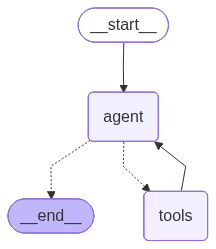

In [12]:
# --- 셀 12: 생성된 그래프(graph) 시각화 ---

from IPython.display import Image, display

# graph.get_graph()를 통해 내부 구조를 가져오고,
# .draw_mermaid_png()를 사용해 PNG 이미지로 렌더링합니다.
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception as e:
    print(f"그래프를 시각화하는 중 오류가 발생했습니다: {e}")
    print("Graphviz 라이브러리가 설치되어 있는지 확인해주세요. (pip install graphviz)")